In [98]:
import pandas as pd

# Load data
df = pd.read_csv("survey_responses.csv")

# Remove whitespace from column names
df.columns = df.columns.str.strip()

df = df.drop(columns=['Timestamp'])

# Rename columns
question_texts = {f"Q{i+1}": col for i, col in enumerate(df.columns)}
df.columns = list(question_texts.keys())

# Example usage
print(df['Q1'].head())
print("---")
"""Remove print(df['Q2'].value_counts())
print("---") """
print("Q1 question text:", question_texts['Q1'])


0        24 – 26
1    27 or older
2    27 or older
3    27 or older
4        24 – 26
Name: Q1, dtype: object
---
Q1 question text: What is your age?


In [99]:
question_types = {
    "Q1": "multiple choice",
    "Q2": "multiple choice",
    "Q3": "multiple choice",
    "Q4": "short answer",
    "Q5": "short answer",
    "Q6": "multiple choice",
    "Q7": "likert scale",
    "Q8": "checkbox",
    "Q9": "likert scale",
    "Q10": "checkbox",
    "Q11": "likert scale",
    "Q12": "likert scale",
    "Q13": "checkbox",
    "Q14": "multiple choice",
    "Q15": "multiple choice",
    "Q16": "checkbox",
    "Q17": "checkbox",
    "Q18": "likert scale",
    "Q19": "multiple choice",
    "Q20": "checkbox",
    "Q21": "open-ended",
    "Q22": "checkbox",
    "Q23": "multiple choice",
    "Q24": "likert scale",
    "Q25": "multiple choice",
    "Q26": "open-ended",
    "Q27": "multiple choice",
    "Q28": "multiple choice",
    "Q29": "multiple choice",
    "Q30": "multiple choice",
    "Q31": "multiple choice",
    "Q32": "likert scale",
    "Q33": "checkbox",
    "Q34": "likert scale",
    "Q35": "checkbox",
    "Q36": "open-ended",
    "Q37": "open-ended",
    "Q38": "open-ended"
}

# Table
rows = []
for q, text in question_texts.items():
    rows.append({
        "Q": q,
        "Type": question_types.get(q),
        "Text": text
    })

# Create DF
questions_df = pd.DataFrame(rows)
questions_df


,Q,Type,Text
0,Q1,multiple choice,What is your age?
1,Q2,multiple choice,What is your gender?
2,Q3,multiple choice,What is your current level of study?
3,Q4,short answer,What is your field of study?
4,Q5,short answer,Which country are you currently living in?
5,Q6,multiple choice,Do you currently follow any dietary preference...
6,Q7,likert scale,"During periods of academic stress, how often d..."
7,Q8,checkbox,What changes do you typically notice in your e...
8,Q9,likert scale,How difficult is it for you to maintain health...
9,Q10,checkbox,Which of the following factors most influence ...


In [100]:
# Map official option to relevant questions
official_options_map = {
    # multiple choice options
    "Q6": [
        "None / I eat everything",
        "Vegetarian",
        "Vegan",
        "Halal",
        "Kosher",
        "Gluten-free",
        "Lactose-free",
        "Allergies or intolerances"
    ],
    "Q14": [
        "Yes, significantly",
        "Yes",
        "Only a bit",
        "Not at all"
    ],
    "Q15": [
        "Yes",
        "No",
        "Not sure"
    ],
    "Q19": [
        "Yes",
        "No",
        "Not sure"
    ],
    "Q23": [
        "I’d be more willing",
        "I’d be less willing",
        "It wouldn’t make a difference",
        "Not sure"
    ],
    "Q25": [
        "More likely",
        "Less likely",
        "No effect",
        "Not sure"
    ],
    "Q27": [
        "Yes, many times",
        "Yes, sometimes",
        "No, but I’ve used it for other topics",
        "No, I’ve never used tools like ChatGPT",
        "I’ve heard of them, but never tried them"
    ],
    "Q28": [
        "Yes",
        "No"
    ],
    "Q29": [
        "Yes, often",
        "Occasionally",
        "Rarely",
        "Never",
        "Not applicable / I don’t follow such preferences"
    ],
    "Q30": [
        "Yes",
        "No",
        "Not sure"
    ],
    "Q31": [
        "A chat-style conversation",
        "A form where I fill in options and get advice",
        "A mix of both",
        "Not sure"
    ],

    # checkbox options
    "Q8": [
        "I skip meals",
        "I crave unhealthy or comfort food",
        "I snack more often",
        "I eat at irregular times",
        "I eat healthier to stay focused",
        "No major changes"
    ],
    "Q10": [
        "Time availability",
        "Budget constraints",
        "Physical wellbeing",
        "Emotional state",
        "Social influence"
    ],
    "Q13": [
        "Nutritional goals",
        "Mood or emotional state",
        "Energy or focus levels",
        "Cultural food preferences",
        "Budget constraints",
        "Sleep or physical health",
        "Device data, like wearables",
        "Religious or ethical preferences",
        "Available time to cook or eat"
    ],
    "Q16": [
        "Adapts to my daily schedule or workload",
        "Considers my budget or what food I have",
        "Suggests quick meals when I'm busy",
        "Checks how I feel before suggesting food",
        "Lets me rate or respond to each recommendation"
    ],
    "Q17": [
        "Gentle reminders",
        "Motivational messages based on how I feel",
        "Tracking meals or consistency",
        "Celebrating small successes",
        "Healthier snack suggestions",
        "Setting flexible daily goals",
        "Challenges with friends or study groups"
    ],
    "Q20": [
        "It matches my dietary needs",
        "It reflects my mood or energy level",
        "It gives a scientific or nutritional reason for its suggestions",
        "It builds on what I’ve chosen before",
        "It uses friendly or human-like language",
        "It fits my current routine or schedule",
        "It allows me to give feedback on suggestions"
    ],
    "Q22": [
        "My dietary needs or preferences",
        "My stress levels",
        "My sleep patterns",
        "My daily schedule or class timetable",
        "My emotional state",
        "My budget",
        "Data from wearables or health trackers"
    ],
    "Q33": [
        "Pre-written templates to show how to ask a question",
        "Step-by-step help for making a request",
        "A helpful conversation that asks clarifying questions",
        "Automatic suggestions based on my situation, like time or stress level",
        "Easy ways to adjust or rewrite my request"
    ],
    "Q35": [
        "Rephrase my request and try again",
        "Ask a follow-up to clarify",
        "Stop using it and look elsewhere",
        "Not sure"
    ]
}


In [106]:
from sklearn.preprocessing import MultiLabelBinarizer

def process_checkbox(column, official_options):
    # Get a list of all values in Q8
    list_col = df[column].str.split(';')

    # Create dummy variables for Q8
    mlb = MultiLabelBinarizer()
    dummies = pd.DataFrame(mlb.fit_transform(list_col),
                           columns=mlb.classes_,
                           index=list_col.index)
    
    # Variable for official options
    filtered = dummies[official_options]

    # Variable for "Other..." options
    others = set(mlb.classes_) - set(official_options)

    return filtered, others


Quantitative results for Q8
-----------------------
I snack more often                   56
I eat at irregular times             54
I crave unhealthy or comfort food    51
I skip meals                         35
No major changes                     13
I eat healthier to stay focused       5
dtype: int64
-----------------------

Other answers from Q8:
-----------------------
Less appetite
I eat food that‘s much quicker to prepare and therefore often less healthy like frozen pizza or instant noodles
I eat snacks as real meals 
Binge Eating
-----------------------


<Axes: title={'center': 'Q8 - Specific Eating Habit Changes under Stress'}>

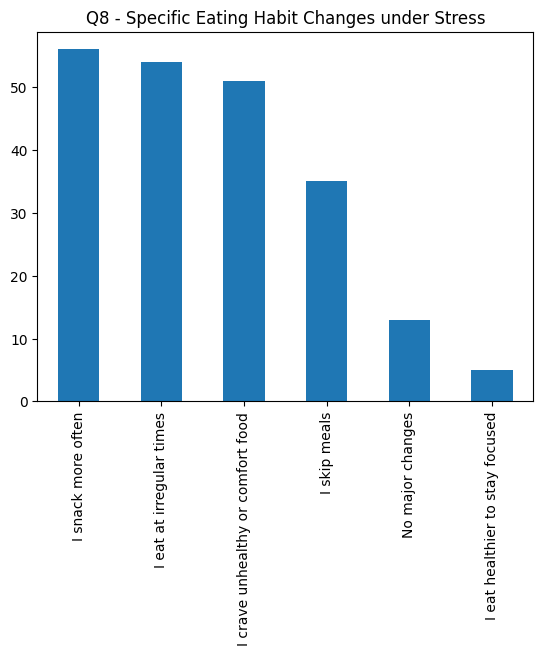

In [ ]:
# Q8 - Specific Eating Habit Changes under Stress

Q8_filtered, Q8_others = process_checkbox('Q8', official_options_map['Q8'])

# Add dummies to the original DataFrame
df = pd.concat([df, Q8_filtered], axis=1)

print("Quantitative results for Q8")
print("-----------------------")
quantitative_results = Q8_filtered.sum().sort_values(ascending=False)
print(quantitative_results)
print("-----------------------")

print("\nOther answers from Q8:")
print("-----------------------")
for answer in Q8_others:
    print(answer)
print("-----------------------")

# Plot the results
quantitative_results.plot(kind='bar', title='Q8 - Specific Eating Habit Changes under Stress')


In [108]:
# Q14 as example (multiple choice)
main_options = ["Yes", "No", "Sometimes"]  # fill with your official options
counts = df['Q14'].value_counts()

# Filter out Other
counts_main = counts[counts.index.isin(main_options)]
print(counts_main)

# Get Other responses
other_responses = df.loc[~df['Q14'].isin(main_options), 'Q14'].dropna().unique()
print(other_responses)

Q14
Yes    41
Name: count, dtype: int64
['Yes, significantly' 'Only a bit' 'Not at all']


Q9
1    11
2    25
3    26
4    31
5    16
Name: count, dtype: int64


<Axes: title={'center': 'Q9 - Difficulty Maintaining Healthy Eating'}, xlabel='Q9'>

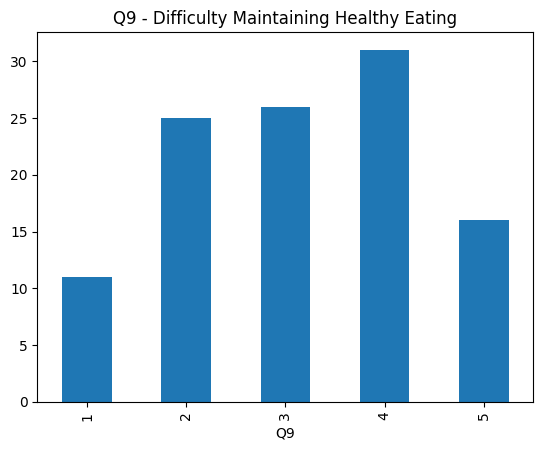

In [104]:
likert_counts = df['Q9'].value_counts().sort_index()
print(likert_counts)
likert_counts.plot(kind='bar', title='Q9 - Difficulty Maintaining Healthy Eating')


In [109]:
answers = df['Q21'].dropna()
# Export for manual coding or review
answers.to_csv('Q21_open_ended.csv', index=False)


In [ ]:
# Get all Q columns marked as open-ended in your questions_df
open_ended_qs = questions_df[questions_df['Type'] == 'open-ended']['Q'].tolist()

# Build a new DataFrame with only those columns
open_ended_df = df[open_ended_qs].copy()

# Drop completely empty rows across all open-ended questions (optional)
open_ended_df = open_ended_df.dropna(how='all')

# Display first rows
open_ended_df.head()

,Q21,Q26,Q36,Q37,Q38
0,"I have stopped using it, but not necessarily b...","Maybe a gamification aspect, something like a ...",I wish they would be more specific on food top...,No comments from me:),NaN
1,Doesn't affect my trust at all,Scientificly based benefits of using it and im...,/,How is the data used / will it be shared with ...,Cool Survey
2,Not at all,Get healthy and nutrient rich meals,NaN,No,NaN
3,NaN,"100% reliance, with aspects that fit my dietar...","Yeah a saveable state of my data, so that I do...",Not really,NaN
4,NaN,A high level of ease of use,I wish they'd stop giving specific or very nic...,There are many times when the accuracy of the ...,NaN


In [168]:
open_responses = df['Q21'].dropna()

for response in open_responses:
    print(response)

I have stopped using it, but not necessarily because it was complicated or tiring, rather because i lacked the motivation or didn't find it helpful nor appealing,. It tends to lack a human touch in my opinion, but a well trained app could make a huge difference
Doesn't affect my trust at all
Not at all
Not at all. 
Not at all
Moien Lio, ech sin et den Dylan! Well, it doesn’t , i think that AI is already pretty evolved so it already has enough trust from my side
Not that much
It does not affect it at all
Not really 
Ist Mayonaise auch ein Instrument?
During academic stress, I will more likely not pay too much attention to the AI and would eat whatever is recommended to save time.
No time to use it wisely
Doesn’t affect.
It doesn't as I don't take the time to ask for AI-based food recommendations during academic stress, as I rely on my knowledge to try and minimise time loss.
Not sure
Academic stress doesn't affect my trust in AI-based food recommendations.
Don’t affect 
Because AI itsel

             Count    Percent
Q1                           
24 – 26         48  44.036697
27 or older     28  25.688073
21 – 23         24  22.018349
18 – 20          8   7.339450
Under 18         1   0.917431


<Axes: title={'center': 'Q1 - Age Distribution'}, xlabel='Q1'>

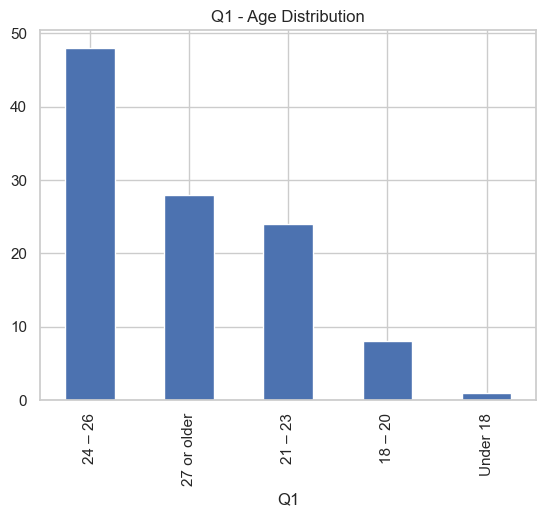

In [169]:
counts = df['Q1'].value_counts(dropna=True)
percent = counts / len(df) * 100
print(pd.DataFrame({'Count': counts, 'Percent': percent}))
counts.plot(kind='bar', title="Q1 - Age Distribution")


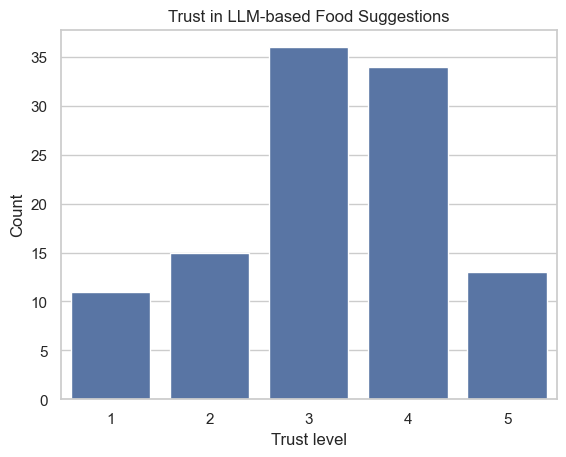

In [170]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")  # cleaner look

# Example: distribution of trust ratings
sns.countplot(data=df, x='Q18')
plt.xlabel("Trust level")
plt.ylabel("Count")
plt.title("Trust in LLM-based Food Suggestions")
plt.show()
